In [1]:
from snow_pc.modeling import terrain_models, surface_models
import leafmap


In [19]:
# laz_fp = r'C:\Users\naheemadebisi\Downloads\dev_work\explore_data\20240213_MCS_Pre_1\20240213_v1-240213_190028_Scanner_1.laz'
# dem_fp = r'C:\Users\naheemadebisi\Downloads\dev_work\dem.tif'

In [21]:
# leafmap.view_lidar(laz_fp)

In [20]:
# dtm_laz, dtm_tif = terrain_models(laz_fp, dem_fp = dem_fp)
# dsm_laz, dsm_tif = surface_models(laz_fp, dem_fp = dem_fp) 

#Photogrammetry point clouds

In [24]:
laz_fp = r'C:\Users\naheemadebisi\Downloads\dev_work\explore_data\20231113\20231113_MCS_UPS\20231113_UPS_shifted.laz'
dem_fp = r'C:\Users\naheemadebisi\Downloads\dev_work\dem.tif'

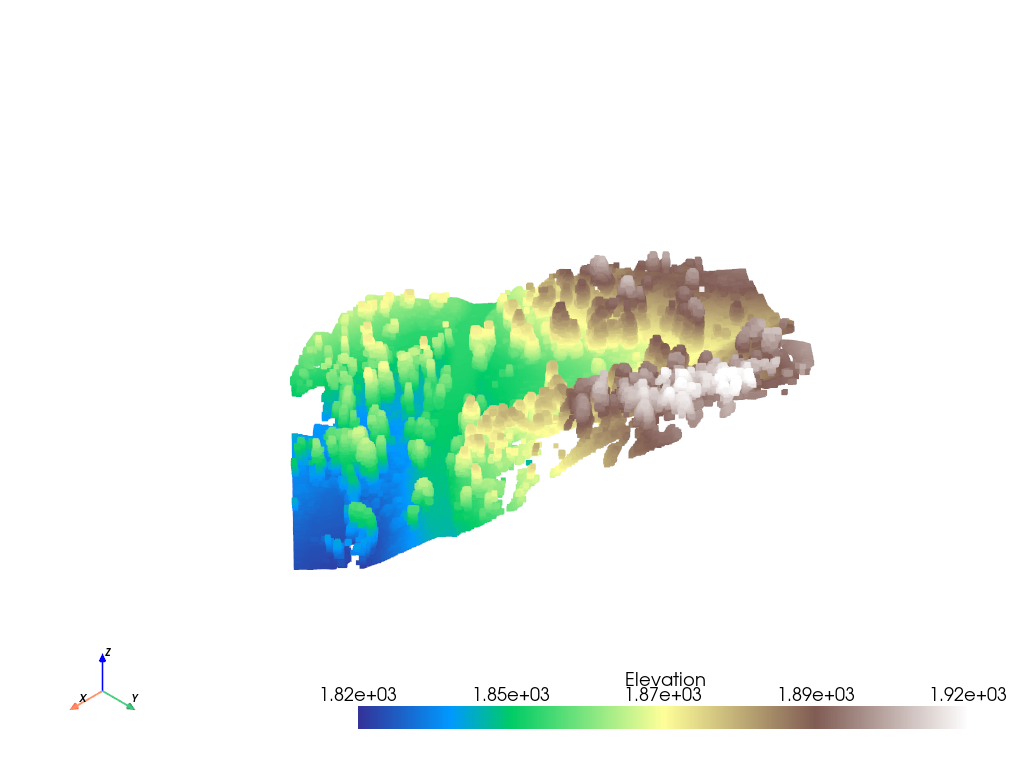

In [25]:
leafmap.view_lidar(laz_fp)

In [26]:
dtm_laz, dtm_tif = terrain_models(laz_fp, dem_fp = dem_fp)
dsm_laz, dsm_tif = surface_models(laz_fp, dem_fp = dem_fp) 